# Player Analysis

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

## Data Cleaning and Exploration

In [117]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [118]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [119]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 24)

In [120]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,2,0,0,0,0,2,2,NaN,NaN


## Taking in Consideration only KKR VS RCB

In [121]:
KKR_RCB = matches[np.logical_or(np.logical_and(matches['team1']=='Kolkata Knight Riders',matches['team2']=='Royal Challengers Bangalore'),
                            np.logical_and(matches['team2']=='Kolkata Knight Riders',matches['team1']=='Royal Challengers Bangalore'))]

In [122]:
KKR_RCB.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
6254,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,S Badree,0,0,0,0,0,0,0,NaN,NaN
6255,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,S Badree,0,0,0,0,4,0,4,NaN,NaN
6256,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,S Badree,0,0,0,0,4,0,4,NaN,NaN
6257,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,S Badree,0,0,0,0,4,0,4,NaN,NaN
6258,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,S Badree,0,0,0,0,6,0,6,NaN,NaN


## Wickets RCB is expected to loss 

In [123]:
rcb = KKR_RCB[(KKR_RCB["over"]>5) & (KKR_RCB["over"]<=20)]
rcb = rcb[rcb["batting_team"]=="Royal Challengers Bangalore"]

In [124]:
rcb.match_id.nunique()

24

In [125]:
wickets = pd.DataFrame(rcb.groupby(["match_id"])["dismissal_kind"].count())

wickets.columns = ["wicket fall"]

print("Wicket fall for RCB between 31st ball to 120th ball :")

wickets

Wicket fall for RCB between 31st ball to 120th ball :


,wicket fall
match_id,
27,6
45,3
60,7
88,2
134,5
156,4
178,5
217,2
258,1


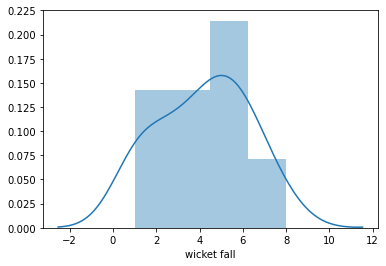

In [126]:
sns.distplot(wickets["wicket fall"])

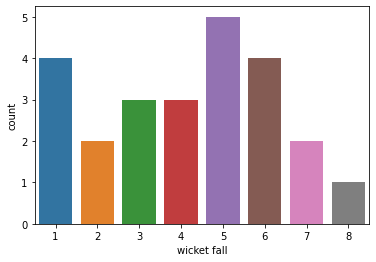

In [127]:
sns.countplot(wickets["wicket fall"])

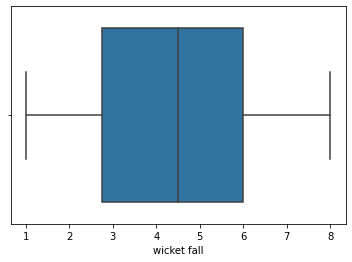

In [128]:
sns.boxplot(wickets["wicket fall"])

In [129]:
print("Average wicket fall for RCB against KKR in 31-120 balls :{}".format(round(wickets["wicket fall"].mean())))

Average wicket fall for RCB against KKR in 31-120 balls :4


- First Inning

In [130]:
first_innings = rcb[rcb["inning"]==1]

first_innings.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
10437,45,2017,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,UT Yadav,0,0,0,0,0,0,0,NaN,NaN
10438,45,2017,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,UT Yadav,1,0,0,0,0,1,1,NaN,NaN
10439,45,2017,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,UT Yadav,0,0,0,0,0,0,0,NaN,NaN
10440,45,2017,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,UT Yadav,0,0,0,0,1,0,1,NaN,NaN
10441,45,2017,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Royal Challengers Bangalore,Kolkata Knight Riders,...,UT Yadav,0,0,0,0,0,0,0,NaN,NaN


In [131]:
first_innings.inning.unique()

array([1], dtype=int64)

In [132]:
first_innings_dismiss = pd.DataFrame(first_innings.groupby(["match_id"])["player_dismissed"].count())

first_innings_dismiss.columns = ["wicket fall"]

first_innings_dismiss

,wicket fall
match_id,
45,3
178,5
441,8
606,6
7896,6
7922,4
11153,3
11326,3


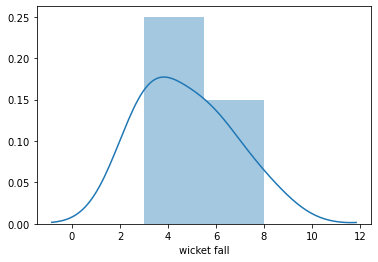

In [133]:
sns.distplot(first_innings_dismiss["wicket fall"])

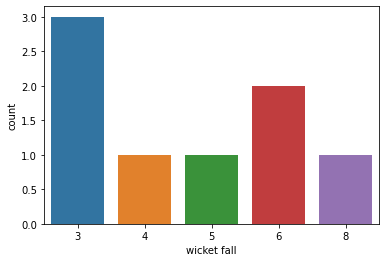

In [134]:
sns.countplot(first_innings_dismiss["wicket fall"])

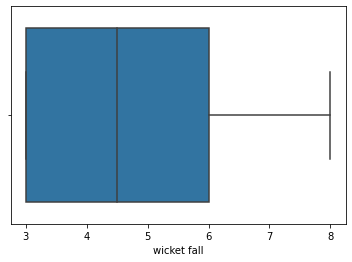

In [135]:
sns.boxplot(first_innings_dismiss["wicket fall"])

In [136]:
print("Average wicket fall for RCB against KKR (31-120 balls) in 1st innings :{}".format(round(first_innings_dismiss["wicket fall"].mean())))

Average wicket fall for RCB against KKR (31-120 balls) in 1st innings :5


- Second Inning

In [137]:
second_innings = rcb[rcb["inning"]==2]

second_innings.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
6408,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,UT Yadav,0,0,0,0,0,0,0,NaN,NaN
6409,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,UT Yadav,0,0,0,0,0,0,0,NaN,NaN
6410,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,UT Yadav,0,0,0,0,4,0,4,NaN,NaN
6411,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,UT Yadav,0,0,2,0,0,2,2,NaN,NaN
6412,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,UT Yadav,0,0,0,0,1,0,1,NaN,NaN


In [138]:
second_innings.inning.unique()

array([2], dtype=int64)

In [139]:
second_innings_dismiss = pd.DataFrame(second_innings.groupby(["match_id"])["player_dismissed"].count())

second_innings_dismiss.columns = ["wicket fall"]

second_innings_dismiss

,wicket fall
match_id,
27,6
60,7
88,2
134,5
156,4
217,2
258,1
291,5
317,7


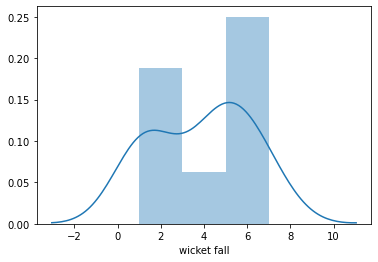

In [140]:
sns.distplot(second_innings_dismiss["wicket fall"])

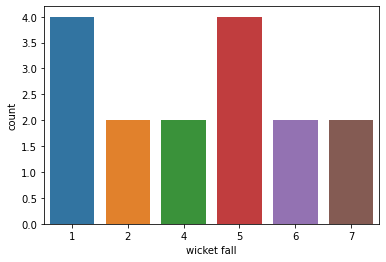

In [141]:
sns.countplot(second_innings_dismiss["wicket fall"])

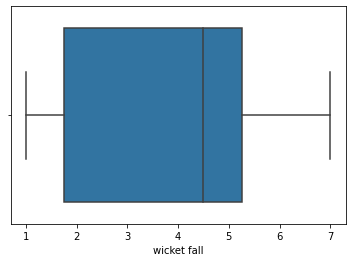

In [142]:
sns.boxplot(second_innings_dismiss["wicket fall"])

In [143]:
print("Average wicket fall for RCB against KKR (31-120 balls) in 2nd innings :{}".format(round(second_innings_dismiss["wicket fall"].mean())))

Average wicket fall for RCB against KKR (31-120 balls) in 2nd innings :4


### Confidence Interval

In [144]:
wickets.describe().T

,count,mean,std,min,25%,50%,75%,max
wicket fall,24.0,4.166667,2.098999,1.0,2.75,4.5,6.0,8.0


In [145]:
mean = wickets["wicket fall"].mean()
sd = wickets["wicket fall"].std()
n = len(wickets)

n

24

In [146]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.42845639127810103

In [147]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("95% Confidence Interval for the wickets that RCb can loose in this match :{}".format((lcb, ucb)))

95% Confidence Interval for the wickets that RCb can loose in this match :(3.0, 5.0)


From all the analysis we have done and taking in consideration the current form of RCB we can predict RCB to loose 3-5 wickets 

## Runs RCB can score of KKR in death

In [153]:
rcb_runs = KKR_RCB[(KKR_RCB["over"]>15) & (KKR_RCB["over"]<=20)]
rcb_runs = rcb_runs[rcb_runs["batting_team"]=="Royal Challengers Bangalore"]

In [154]:
rcb_runs.over.unique()

array([16, 17, 18, 19, 20], dtype=int64)

In [155]:
rcb_runs.match_id.nunique()

21

In [156]:
rcb_total = pd.DataFrame(rcb_runs.groupby(["season",'match_id'])["total_runs"].sum())

rcb_total

total_runs
season match_id            
2008   60                 1
       88                13
2009   134               45
       156               57
2010   178               46
       217               42
2011   258               23
2012   317               42
       344               56
2013   392               41
       441               31
2014   468               32
       506               59
2015   522               60
2016   606               73
       624               51
2017   45                53
2018   7896              45
       7922              69
2019   11153             66
       11326             94

In [157]:
print("Average runs that RCB is expected to score in death overs against KKR :{}".format(round(rcb_total["total_runs"].mean())))

Average runs that RCB is expected to score in death overs against KKR :48


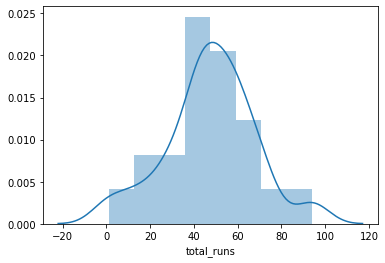

In [158]:
sns.distplot(rcb_total["total_runs"])

Text(0.5, 1.0, 'Runs Scored')

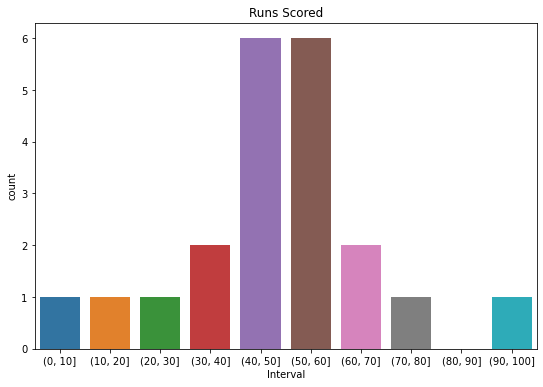

In [159]:
plt.figure(figsize = (9,6))
rcb_total["Interval"] = pd.cut(rcb_total["total_runs"],[0,10,20,30,40,50,60,70,80,90,100])
#sns.countplot(x ="Interval",y ="Scores",data= copy,size = 15)
sns.countplot(rcb_total["Interval"])
plt.title("Runs Scored")

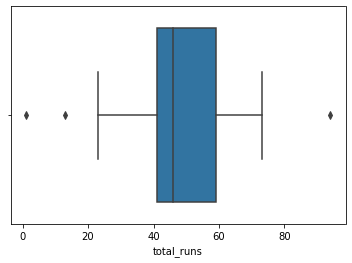

In [160]:
sns.boxplot(rcb_total["total_runs"])

We can see a few outliers are present 

## Removal of Outliers

In [161]:
rcb_total['z_score']=stats.zscore(rcb_total["total_runs"])


rcb_total

total_runs   Interval   z_score
season match_id                                 
2008   60                 1    (0, 10] -2.288974
       88                13   (10, 20] -1.699177
2009   134               45   (40, 50] -0.126385
       156               57   (50, 60]  0.463412
2010   178               46   (40, 50] -0.077235
       217               42   (40, 50] -0.273834
2011   258               23   (20, 30] -1.207679
2012   317               42   (40, 50] -0.273834
       344               56   (50, 60]  0.414262
2013   392               41   (40, 50] -0.322984
       441               31   (30, 40] -0.814481
2014   468               32   (30, 40] -0.765332
       506               59   (50, 60]  0.561711
2015   522               60   (50, 60]  0.610861
2016   606               73   (70, 80]  1.249808
       624               51   (50, 60]  0.168513
2017   45                53   (50, 60]  0.266813
2018   7896              45   (40, 50] -0.126385
       7922              69   (60, 70]  1.053209
2019   11153             66   (60, 70]  0.905760
       11326             94  (90, 100]  2.281952

In [162]:
rcb_total = rcb_total.loc[(rcb_total['z_score'].abs()<=1.5) & (rcb_total['z_score'].abs()>=-1.5)]

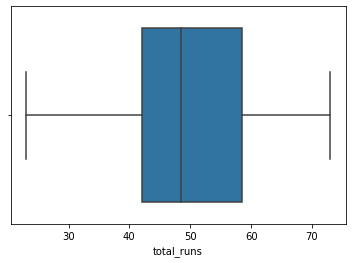

In [163]:
sns.boxplot(rcb_total["total_runs"])

## Confidence Interval

In [164]:
rcb_total.describe().iloc[:,:1].T

,count,mean,std,min,25%,50%,75%,max
total_runs,18.0,49.5,13.517962,23.0,42.0,48.5,58.5,73.0


In [165]:
mean = rcb_total["total_runs"].mean()
sd = rcb_total["total_runs"].std()
n = len(rcb_total)

n

18

In [166]:
tstar = 2.064
se = sd/np.sqrt(n)
se

3.1862141774076846

In [167]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("So , our 95% Confidence Interval for Total runs that RCB is expected to score in death overs in this's match :{}".format((lcb, ucb)))

So , our 95% Confidence Interval for Total runs that RCB is expected to score in death overs in this's match :(43.0, 56.0)
